In [149]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [150]:
X_train = pd.read_csv("train_time_series.csv", index_col=0)
X_test = pd.read_csv("test_time_series.csv", index_col=0)
y_train = pd.read_csv("train_labels.csv", index_col=0)
y_test = pd.read_csv("test_labels.csv", index_col=0)

for data in [X_train, X_test]:
    data.drop("accuracy", axis = 1, inplace = True)

for data in [X_train, y_train, X_test, y_test]:
    data.drop("UTC time", axis = 1, inplace = True)
    

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

df_train = X_train.merge(y_train, how = "left", left_on = "timestamp", right_on = "timestamp") # merge X_train with y_train
df_test = X_test.merge(y_test, how = "left", left_on = "timestamp", right_on = "timestamp") # and vice versa

print(df_train.head())
print(df_test.head())


(3744, 4) (375, 2) (1250, 4) (125, 2)
       timestamp         x         y         z  label
0  1565109930787 -0.006485 -0.934860 -0.069046    NaN
1  1565109930887 -0.066467 -1.015442  0.089554    NaN
2  1565109930987 -0.043488 -1.021255  0.178467    NaN
3  1565109931087 -0.053802 -0.987701  0.068985    1.0
4  1565109931188 -0.054031 -1.003616  0.126450    NaN
       timestamp         x         y         z  label
0  1565110306139  0.034286 -1.504456  0.157623    NaN
1  1565110306239  0.409164 -1.038544  0.030975    NaN
2  1565110306340 -0.234390 -0.984558  0.124771    NaN
3  1565110306440  0.251114 -0.787003  0.054810    NaN
4  1565110306540  0.109924 -0.169510  0.235550    NaN


(375, 5) (1250, 5)
        timestamp         x         y         z  label
3   1565109931087 -0.053802 -0.987701  0.068985    1.0
13  1565109932090  0.013718 -0.852371 -0.000870    1.0
23  1565109933092  0.145584 -1.007843 -0.036819    1.0
33  1565109934094 -0.099380 -1.209686  0.304489    1.0
43  1565109935097  0.082794 -1.001434 -0.025375    1.0
       timestamp         x         y         z  label
0  1565110306139  0.034286 -1.504456  0.157623    NaN
1  1565110306239  0.409164 -1.038544  0.030975    NaN
2  1565110306340 -0.234390 -0.984558  0.124771    NaN
3  1565110306440  0.251114 -0.787003  0.054810    NaN
4  1565110306540  0.109924 -0.169510  0.235550    NaN
Counter({2.0: 213, 3.0: 88, 4.0: 47, 1.0: 27})


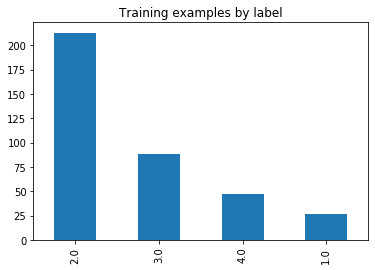

In [151]:
df_train = df_train.dropna(how = "any")


print(df_train.shape, df_test.shape)
print(df_train.head())
print(df_test.head())

from collections import Counter
print(Counter(df_train.label))

df_train['label'].value_counts().plot(kind='bar', title='Training examples by label');

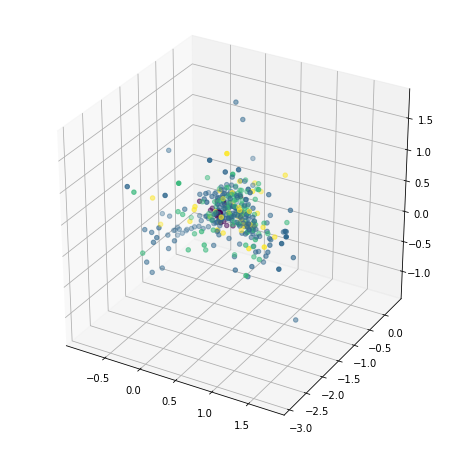

(375, 5)


,timestamp,x,y,z,label
3,1565109931087,-0.053802,-0.987701,0.068985,1.0
13,1565109932090,0.013718,-0.852371,-0.000870,1.0
23,1565109933092,0.145584,-1.007843,-0.036819,1.0
33,1565109934094,-0.099380,-1.209686,0.304489,1.0
43,1565109935097,0.082794,-1.001434,-0.025375,1.0


In [152]:
x = df_train["x"]
y = df_train["y"]
z = df_train["z"]
label = df_train["label"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=label)
plt.show()
print(df_train.shape)
df_train.head()

In [153]:
df_test = df_test.drop(labels = "label", axis = 1)
df_test = df_test.merge(y_test, how = "right", left_on = "timestamp", right_on = "timestamp")
print(df_train)
print(df_test)
print(df_train.isnull().any())
print(df_test.isnull().any())

          timestamp         x         y         z  label
3     1565109931087 -0.053802 -0.987701  0.068985    1.0
13    1565109932090  0.013718 -0.852371 -0.000870    1.0
23    1565109933092  0.145584 -1.007843 -0.036819    1.0
33    1565109934094 -0.099380 -1.209686  0.304489    1.0
43    1565109935097  0.082794 -1.001434 -0.025375    1.0
...             ...       ...       ...       ...    ...
3703  1565110302030 -0.641953 -1.469177  0.301041    4.0
3713  1565110303032 -0.171616 -0.366074 -0.059082    4.0
3723  1565110304034  0.401810 -1.077698  0.258911    4.0
3733  1565110305037  0.330338 -1.470062  0.303894    4.0
3743  1565110306039  0.689346 -0.991043  0.034973    4.0

[375 rows x 5 columns]
         timestamp         x         y         z  label
0    1565110307041  0.098282 -0.833771  0.118042    NaN
1    1565110308043  0.348465 -0.946701 -0.051041    NaN
2    1565110309046  0.377335 -0.849243 -0.026474    NaN
3    1565110310048  0.110077 -0.520325  0.312714    NaN
4    1565110

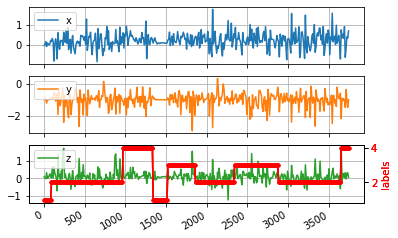

In [154]:
def plot_activity(df):
    data = df[['x', 'y', 'z']]
    axis = data.plot(subplots=True, grid = True)
    for ax1 in axis:
        ax1.legend(loc='upper left')
        
    for ax2 in axis:
        ax2 = ax1.twinx()
        ax2.set_ylabel("labels", color = "red")
        ax2.plot(df["label"], color = "red", marker = ".")
        ax2.tick_params(axis = "y", labelcolor = "red")
    
plot_activity( df_train) 

In [155]:
from sklearn.model_selection import train_test_split
df_train.reset_index(drop = True, inplace = True)
df_trainx = df_train[1:]
train , test = train_test_split(df_trainx, test_size = 0.25)
print(train)
print(test)
print(Counter(train.label))
print(Counter(test.label))

         timestamp         x         y         z  label
259  1565110190775  0.302704 -0.927261  0.084137    3.0
252  1565110183759  0.170059 -0.834320  0.330231    3.0
22   1565109953138  0.206055 -0.632416 -0.046280    2.0
273  1565110204807  0.315002 -1.045975 -0.515274    3.0
91   1565110022296 -0.043335 -0.859970 -0.049911    2.0
..             ...       ...       ...       ...    ...
264  1565110195786  0.366867 -0.434753  0.388565    3.0
280  1565110211823  0.275391 -0.700226  0.007645    3.0
317  1565110248908  0.650558 -1.006989 -0.117783    2.0
170  1565110101570  0.443329 -0.720200  0.039001    3.0
78   1565110009266  0.002563 -0.889557  0.043701    2.0

[280 rows x 5 columns]
         timestamp         x         y         z  label
159  1565110090545  0.548279 -1.175323 -0.012741    3.0
320  1565110251915 -0.699860 -0.766037 -0.577637    2.0
201  1565110132641  0.665878 -0.719635  0.096710    2.0
352  1565110283988  0.377487 -1.026398 -0.326889    2.0
104  1565110035326  0.29

RMSE value for k=  1 is: 0.933991662453105
RMSE value for k=  2 is: 0.8202879618923661
RMSE value for k=  3 is: 0.7892600598537711
RMSE value for k=  4 is: 0.7876203048937038
RMSE value for k=  5 is: 0.7917123913633649
RMSE value for k=  6 is: 0.7796541028523885
RMSE value for k=  7 is: 0.8004286736859855
RMSE value for k=  8 is: 0.7936122974875102
RMSE value for k=  9 is: 0.7899254003806533
RMSE value for k=  10 is: 0.7739096654085449
RMSE value for k=  11 is: 0.7820295697311479
RMSE value for k=  12 is: 0.780080389262276
RMSE value for k=  13 is: 0.7719265365741125
RMSE value for k=  14 is: 0.7674019644723278
RMSE value for k=  15 is: 0.7676989658242739
RMSE value for k=  16 is: 0.7688240536897339
RMSE value for k=  17 is: 0.7701261643800963
RMSE value for k=  18 is: 0.767408076769487
RMSE value for k=  19 is: 0.7696273646555915
RMSE value for k=  20 is: 0.768633769971386
RMSE value for k=  21 is: 0.7657892365541661
RMSE value for k=  22 is: 0.7608022844695976
RMSE value for k=  23 i

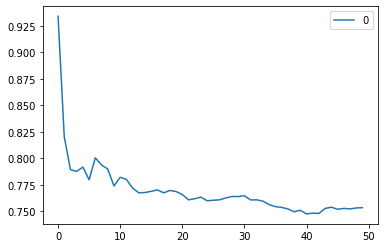

In [156]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = []
for K in range(50):
    K = K+1
    neigh  = neighbors.KNeighborsRegressor(n_neighbors = K)
    neigh.fit(train[["x","y","z"]], train["label"])
    pred = neigh.predict(test[["x","y","z"]])
    error = sqrt(mean_squared_error(test[["label"]],pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) 
curve.plot()


In [157]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=35)

neigh.fit(train[["x","y","z"]], train["label"])
pred = neigh.predict(test[["x","y","z"]])
print(pred)


[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 1. 2. 1. 3. 1. 1. 2. 2. 2. 2. 2. 2. 3. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 1. 3. 2. 1. 3.
 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 2. 2. 2. 2. 1. 2. 2.]


In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

print(accuracy_score(test["label"],pred ,  normalize=True, sample_weight=None))
print(r2_score(test["label"],pred , sample_weight=None, multioutput='uniform_average'))
print( f1_score(test["label"],pred , average='weighted'))

0.574468085106383
-0.3775862068965521
0.521438347642155


In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [160]:
regression_target = 'label'
classification_target = 'label'
all_covariates = ['x','y','z']

regression_outcome = df_train[regression_target]
classification_outcome = df_train[classification_target]
covariates = df_train[all_covariates]



In [161]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return r2_score( predictions, y)
    
def accuracy(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return accuracy_score( predictions, y)  

In [166]:
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

print(linear_regression_scores.mean() )
print(forest_regression_scores.mean())
print(logistic_regression_scores.mean())
print(forest_classification_scores.mean())

-21.17751181943465
0.5769547791230817
0.5682788051209104
0.9226884779516359
